<h1><center>CSEN1022:Assignment 2</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name:       Omar Tareq El-Sebaey

GUC-ID:     43-11815

Elective Tutorial No.:

**Member 2**

Name:       Zeyad Salah Ali

GUC-ID:     43-3532

Elective Tutorial No.:

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [349]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
confusion_matrices_nb = []
confusion_matrices_gm = []

## Read Data

In [350]:
def Read_Data(address: str, count = 5000, width = 32) -> np.ndarray:
    return np.array([cv2.resize(plt.imread(address + str(i) + '.jpg'), (width, width), interpolation=cv2.INTER_AREA).flatten() / 255 for i in range(count)])

In [351]:
def Plot_Data(data: list[np.ndarray], titles: list[str], nrows = 1, ncols = 2, figsize = (30, 10), cmap = 'gray') -> None:
    plt.subplots(nrows = nrows, ncols = ncols, figsize = figsize)

    for i in range(len(data)):
        plt.subplot(nrows, ncols, (i + 1))
        plt.title(titles[i])
        plt.imshow(data[i], cmap = cmap)

    plt.show()

In [352]:
# X_train, X_test
Train_Data, Test_Data = {}, {}

for i in range(4):
    width = 32 // 2**i
    Train_Data[f'X_Train_{width}'] = np.concatenate((Read_Data('Data/train/airplane/'  , width=width), 
                                                     Read_Data('Data/train/automobile/', width=width), 
                                                     Read_Data('Data/train/frog/'      , width=width)))

    Test_Data[f'X_Test_{width}'] = np.concatenate((Read_Data('Data/test/airplane/'  , 1000, width),
                                                   Read_Data('Data/test/automobile/', 1000, width),
                                                   Read_Data('Data/test/frog/'      , 1000, width)))

### Visualizing the Data

X_Train_32: (15000, 3072) , X_Test_32: (3000, 3072)
X_Train_16: (15000, 768) , X_Test_16: (3000, 768)
X_Train_8: (15000, 192) , X_Test_8: (3000, 192)
X_Train_4: (15000, 48) , X_Test_4: (3000, 48)


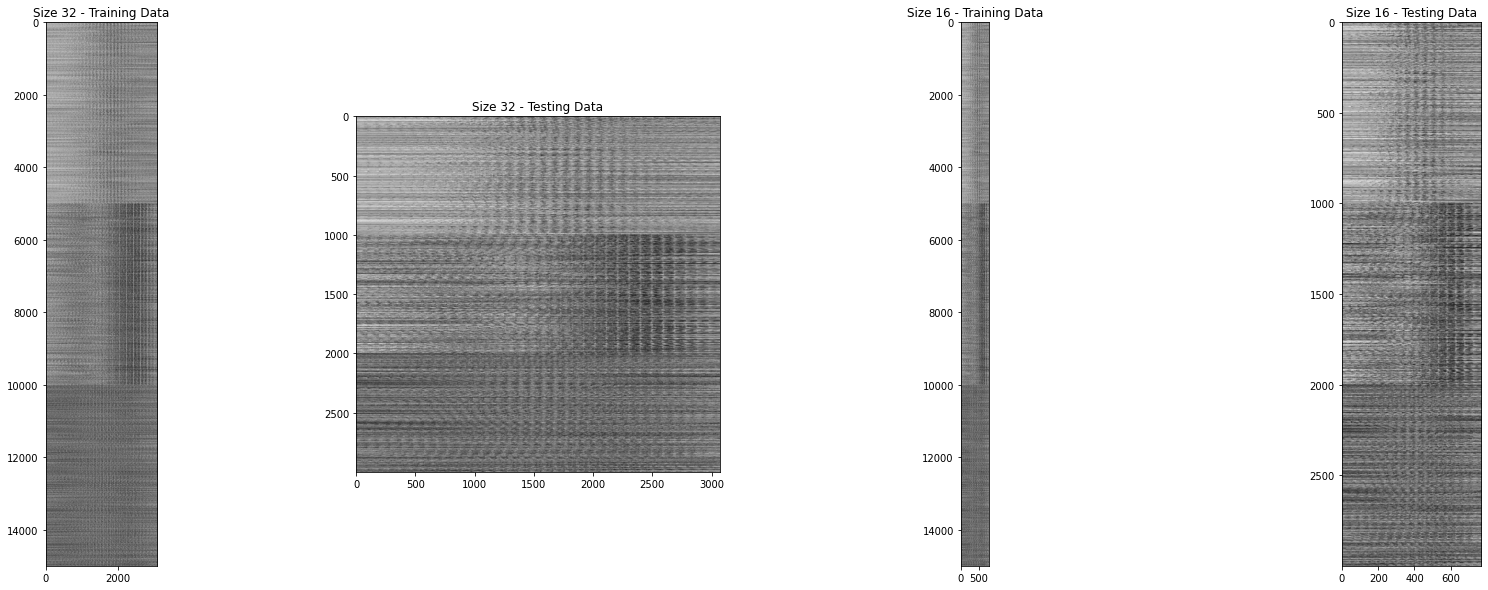

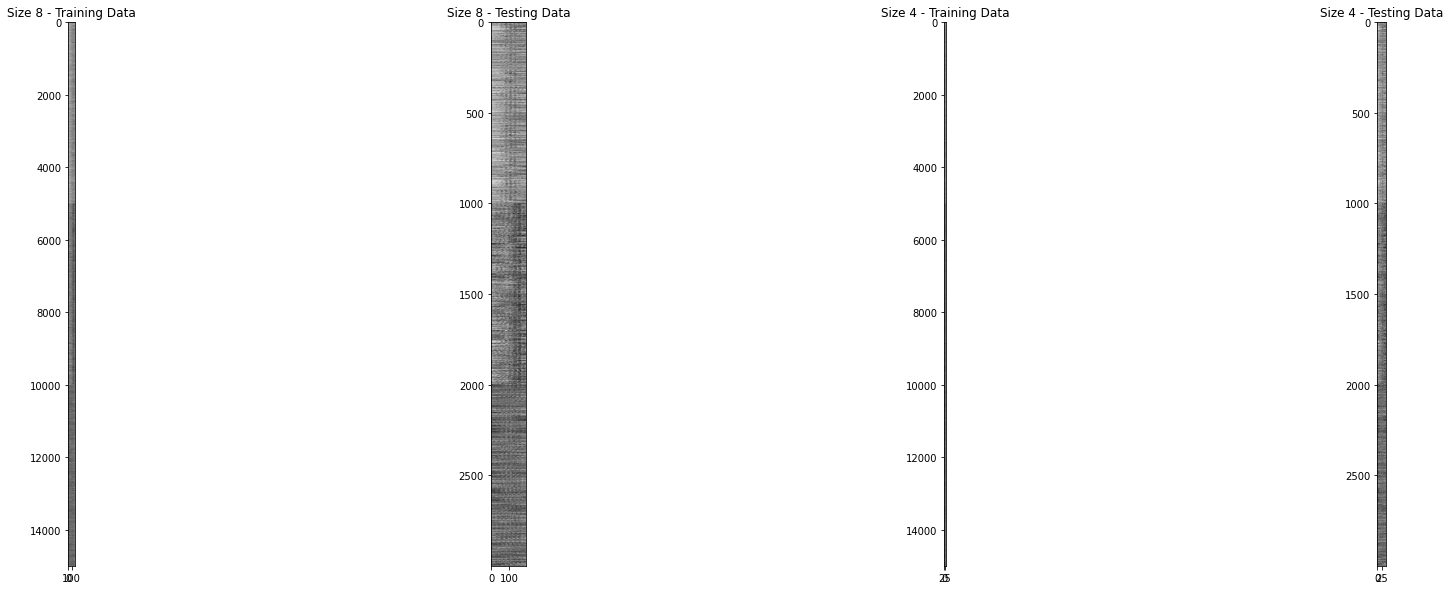

In [353]:
for i in range(4):
    train, test = 'X_Train_' + str(32 // 2**i), 'X_Test_'  + str(32 // 2**i)
    print(f'{train}:', Train_Data[train].shape, f', {test}:', Test_Data[test].shape)

Plot_Data([Train_Data['X_Train_32'] , Test_Data['X_Test_32']  , Train_Data['X_Train_16'] , Test_Data['X_Test_16']  ], 
          ['Size 32 - Training Data', 'Size 32 - Testing Data', 'Size 16 - Training Data', 'Size 16 - Testing Data'], nrows = 1, ncols = 4)

Plot_Data([Train_Data['X_Train_8'] , Test_Data['X_Test_8']  , Train_Data['X_Train_4'] , Test_Data['X_Test_4']  ], 
          ['Size 8 - Training Data', 'Size 8 - Testing Data', 'Size 4 - Training Data', 'Size 4 - Testing Data'], nrows = 1, ncols = 4)

<hr style="border:2px solid black"> </hr>

## Construct Naive Bayes classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

### Calculating the means & variances of the training data of all sizes

In [354]:
Train_Data_Mean, Train_Data_Variance = {}, {}

for i in range(4):
    subset = str(32 // 2**i)
    Train_Data_Mean[f'Airplane_Mean_{subset}'  ] = np.mean(Train_Data[f'X_Train_{subset}'][     : 5000 ], axis = 0)
    Train_Data_Mean[f'Automobile_Mean_{subset}'] = np.mean(Train_Data[f'X_Train_{subset}'][5000 : 10000], axis = 0)
    Train_Data_Mean[f'Frog_Mean_{subset}'      ] = np.mean(Train_Data[f'X_Train_{subset}'][10000:      ], axis = 0)

    Train_Data_Variance[f'Airplane_Variance_{subset}'  ] = np.var(Train_Data[f'X_Train_{subset}'][     : 5000 ], axis = 0)
    Train_Data_Variance[f'Automobile_Variance_{subset}'] = np.var(Train_Data[f'X_Train_{subset}'][5000 : 10000], axis = 0)
    Train_Data_Variance[f'Frog_Variance_{subset}'      ] = np.var(Train_Data[f'X_Train_{subset}'][10000:      ], axis = 0)

### Mean & Variances Dimensions Review

In [355]:
for i in range(4):
    subset = str(32 // 2**i)

    print(f'Airplane_Mean_{subset}:'      , Train_Data_Mean[f'Airplane_Mean_{subset}'].shape, 
          f', Airplane_Variance_{subset}:', Train_Data_Variance[f'Airplane_Variance_{subset}'].shape)

    print(f'Automobile_Mean_{subset}:'      , Train_Data_Mean[f'Automobile_Mean_{subset}'].shape, 
          f', Automobile_Variance_{subset}:', Train_Data_Variance[f'Automobile_Variance_{subset}'].shape)

    print(f'Frog_Mean_{subset}:'      , Train_Data_Mean[f'Frog_Mean_{subset}'].shape, 
          f', Frog_Variance_{subset}:', Train_Data_Variance[f'Frog_Variance_{subset}'].shape)

    print()

Airplane_Mean_32: (3072,) , Airplane_Variance_32: (3072,)
Automobile_Mean_32: (3072,) , Automobile_Variance_32: (3072,)
Frog_Mean_32: (3072,) , Frog_Variance_32: (3072,)

Airplane_Mean_16: (768,) , Airplane_Variance_16: (768,)
Automobile_Mean_16: (768,) , Automobile_Variance_16: (768,)
Frog_Mean_16: (768,) , Frog_Variance_16: (768,)

Airplane_Mean_8: (192,) , Airplane_Variance_8: (192,)
Automobile_Mean_8: (192,) , Automobile_Variance_8: (192,)
Frog_Mean_8: (192,) , Frog_Variance_8: (192,)

Airplane_Mean_4: (48,) , Airplane_Variance_4: (48,)
Automobile_Mean_4: (48,) , Automobile_Variance_4: (48,)
Frog_Mean_4: (48,) , Frog_Variance_4: (48,)



### Calculating Probabilities

#### Probability Calculator

In [356]:
def Calculate_Probabilities(image: np.ndarray, mean: np.ndarray, variance: np.ndarray) -> float:
    return ((np.exp((-1 * np.square(image - mean)) / (2 * variance))) / np.sqrt(2 * np.pi * variance))


#### Calculating Probabilities

In [357]:
Data_Probabilities_NB = {
    'X_Probabilities_32' : np.ones((3000, 3), dtype = np.float64),
    'X_Probabilities_16' : np.ones((3000, 3), dtype = np.float64),
    'X_Probabilities_8'  : np.ones((3000, 3), dtype = np.float64),
    'X_Probabilities_4'  : np.ones((3000, 3), dtype = np.float64)
}

##### Calculating Airplane Probabiliites

In [358]:
for i in range(3000):
    Data_Probabilities_NB['X_Probabilities_32'][i, 0] *= np.sum(np.log(Calculate_Probabilities(
                                                                Test_Data['X_Test_32'][i], 
                                                                Train_Data_Mean['Airplane_Mean_32'], 
                                                                Train_Data_Variance['Airplane_Variance_32'])))

    Data_Probabilities_NB['X_Probabilities_16'][i, 0] *= np.sum(np.log(Calculate_Probabilities(
                                                                Test_Data['X_Test_16'][i], 
                                                                Train_Data_Mean['Airplane_Mean_16'], 
                                                                Train_Data_Variance['Airplane_Variance_16'])))

    Data_Probabilities_NB['X_Probabilities_8'][i, 0] *= np.sum(np.log(Calculate_Probabilities(
                                                                Test_Data['X_Test_8'][i], 
                                                                Train_Data_Mean['Airplane_Mean_8'], 
                                                                Train_Data_Variance['Airplane_Variance_8'])))

    Data_Probabilities_NB['X_Probabilities_4'][i, 0] *= np.sum(np.log(Calculate_Probabilities(
                                                                Test_Data['X_Test_4'][i], 
                                                                Train_Data_Mean['Airplane_Mean_4'], 
                                                                Train_Data_Variance['Airplane_Variance_4'])))

##### Calculating Automobile Porbabilities

In [359]:
for i in range(3000):
    Data_Probabilities_NB['X_Probabilities_32'][i, 1] *= np.sum(np.log(Calculate_Probabilities(
                                                                Test_Data['X_Test_32'][i], 
                                                                Train_Data_Mean['Automobile_Mean_32'], 
                                                                Train_Data_Variance['Automobile_Variance_32'])))

    Data_Probabilities_NB['X_Probabilities_16'][i, 1] *= np.sum(np.log(Calculate_Probabilities(
                                                                Test_Data['X_Test_16'][i], 
                                                                Train_Data_Mean['Automobile_Mean_16'], 
                                                                Train_Data_Variance['Automobile_Variance_16'])))

    Data_Probabilities_NB['X_Probabilities_8'][i, 1] *= np.sum(np.log(Calculate_Probabilities(
                                                                Test_Data['X_Test_8'][i], 
                                                                Train_Data_Mean['Automobile_Mean_8'], 
                                                                Train_Data_Variance['Automobile_Variance_8'])))

    Data_Probabilities_NB['X_Probabilities_4'][i, 1] *= np.sum(np.log(Calculate_Probabilities(
                                                                Test_Data['X_Test_4'][i], 
                                                                Train_Data_Mean['Automobile_Mean_4'], 
                                                                Train_Data_Variance['Automobile_Variance_4'])))

##### Calculating Frog Probabilites

In [360]:
for i in range(3000):
    Data_Probabilities_NB['X_Probabilities_32'][i, 2] *= np.sum(np.log(Calculate_Probabilities(
                                                                Test_Data['X_Test_32'][i], 
                                                                Train_Data_Mean['Frog_Mean_32'], 
                                                                Train_Data_Variance['Frog_Variance_32'])))

    Data_Probabilities_NB['X_Probabilities_16'][i, 2] *= np.sum(np.log(Calculate_Probabilities(
                                                                Test_Data['X_Test_16'][i], 
                                                                Train_Data_Mean['Frog_Mean_16'], 
                                                                Train_Data_Variance['Frog_Variance_16'])))

    Data_Probabilities_NB['X_Probabilities_8'][i, 2] *= np.sum(np.log(Calculate_Probabilities(
                                                                Test_Data['X_Test_8'][i], 
                                                                Train_Data_Mean['Frog_Mean_8'], 
                                                                Train_Data_Variance['Frog_Variance_8'])))

    Data_Probabilities_NB['X_Probabilities_4'][i, 2] *= np.sum(np.log(Calculate_Probabilities(
                                                                Test_Data['X_Test_4'][i], 
                                                                Train_Data_Mean['Frog_Mean_4'], 
                                                                Train_Data_Variance['Frog_Variance_4'])))

### Constructing Confusion Matrix

In [361]:
Confusion_Matrices_NB = {
    'confusion_matrix_32' : np.zeros((3, 3), dtype=np.int16),
    'confusion_matrix_16' : np.zeros((3, 3), dtype=np.int16),
    'confusion_matrix_8'  : np.zeros((3, 3), dtype=np.int16),
    'confusion_matrix_4'  : np.zeros((3, 3), dtype=np.int16)
}

#### Class 32 $\times$ 32

In [362]:
for i in range(1000):
    maxProb = Data_Probabilities_NB['X_Probabilities_32'].argmax(axis = 1)

    Confusion_Matrices_NB['confusion_matrix_32'][0, maxProb[i       ]] += 1
    Confusion_Matrices_NB['confusion_matrix_32'][1, maxProb[i + 1000]] += 1
    Confusion_Matrices_NB['confusion_matrix_32'][2, maxProb[i + 2000]] += 1

#### Class 16 $\times$ 16

In [363]:
for i in range(1000):
    maxProb = Data_Probabilities_NB['X_Probabilities_16'].argmax(axis = 1)

    Confusion_Matrices_NB['confusion_matrix_16'][0, maxProb[i       ]] += 1
    Confusion_Matrices_NB['confusion_matrix_16'][1, maxProb[i + 1000]] += 1
    Confusion_Matrices_NB['confusion_matrix_16'][2, maxProb[i + 2000]] += 1

#### Class 8 $\times$ 8

In [364]:
for i in range(1000):
    maxProb = Data_Probabilities_NB['X_Probabilities_8'].argmax(axis = 1)

    Confusion_Matrices_NB['confusion_matrix_8'][0, maxProb[i       ]] += 1
    Confusion_Matrices_NB['confusion_matrix_8'][1, maxProb[i + 1000]] += 1
    Confusion_Matrices_NB['confusion_matrix_8'][2, maxProb[i + 2000]] += 1

#### Class 4 $\times$ 4

In [365]:
for i in range(1000):
    maxProb = Data_Probabilities_NB['X_Probabilities_4'].argmax(axis = 1)

    Confusion_Matrices_NB['confusion_matrix_4'][0, maxProb[i       ]] += 1
    Confusion_Matrices_NB['confusion_matrix_4'][1, maxProb[i + 1000]] += 1
    Confusion_Matrices_NB['confusion_matrix_4'][2, maxProb[i + 2000]] += 1

In [366]:
confusion_matrices_nb.clear() 

confusion_matrices_nb += [Confusion_Matrices_NB['confusion_matrix_32']]
confusion_matrices_nb += [Confusion_Matrices_NB['confusion_matrix_16']]
confusion_matrices_nb += [Confusion_Matrices_NB['confusion_matrix_8']]
confusion_matrices_nb += [Confusion_Matrices_NB['confusion_matrix_4']]

<hr style="border:2px solid black"> </hr>

## Construct Gaussian Generative Model classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

### Covariance Calculator

In [367]:
def Covariance_Calculator(group: str, groupSize: int) -> np.ndarray:
    mean = Train_Data_Mean[f'{group}_Mean_{groupSize}']
    top_boundary    = 0    if group == 'Airplane' else 5000  if group == 'Automobile' else 10000
    bottom_boundary = 5000 if group == 'Airplane' else 10000 if group == 'Automobile' else 15000

    data = Train_Data[f'X_Train_{groupSize}'][top_boundary : bottom_boundary]

    return (data - mean).T @ (data - mean)

#### Constructing Covariance Matrices

In [368]:
Data_Covariance = {}

for i in range(4):
    subset = 32 // 2**i

    Data_Covariance[f'Airplane_Covariance_{subset}'  ] = Covariance_Calculator('Airplane', subset)
    Data_Covariance[f'Automobile_Covariance_{subset}'] = Covariance_Calculator('Automobile', subset)
    Data_Covariance[f'Frog_Covariance_{subset}'      ] = Covariance_Calculator('Frog', subset)

##### Covariance Matrices Dimensions Diagnosis

In [369]:
for i in range(4):
    subset = 32 // 2**i
    print(f'Airplane_Covariance_{subset}:'  , Data_Covariance[f'Airplane_Covariance_{subset}'  ].shape)
    print(f'Automobile_Covariance_{subset}:', Data_Covariance[f'Automobile_Covariance_{subset}'].shape)
    print(f'Frog_Covariance_{subset}:'      , Data_Covariance[f'Frog_Covariance_{subset}'      ].shape)
    print()

Airplane_Covariance_32: (3072, 3072)
Automobile_Covariance_32: (3072, 3072)
Frog_Covariance_32: (3072, 3072)

Airplane_Covariance_16: (768, 768)
Automobile_Covariance_16: (768, 768)
Frog_Covariance_16: (768, 768)

Airplane_Covariance_8: (192, 192)
Automobile_Covariance_8: (192, 192)
Frog_Covariance_8: (192, 192)

Airplane_Covariance_4: (48, 48)
Automobile_Covariance_4: (48, 48)
Frog_Covariance_4: (48, 48)



#### Constructing Inverse Covariance Matrices

In [370]:
Data_Inverse_Covariance = {}

for i in range(4):
    subset = 32 // 2**i

    Data_Inverse_Covariance[f'Airplane_Inverse_Covariance_{subset}'  ] = np.linalg.pinv(Data_Covariance[f'Airplane_Covariance_{subset}'  ])
    Data_Inverse_Covariance[f'Automobile_Inverse_Covariance_{subset}'] = np.linalg.pinv(Data_Covariance[f'Automobile_Covariance_{subset}'])
    Data_Inverse_Covariance[f'Frog_Inverse_Covariance_{subset}'      ] = np.linalg.pinv(Data_Covariance[f'Frog_Covariance_{subset}'      ])

##### Inverse Coveriance Matrices Diagnoses

In [371]:
for i in range(4):
    subset = 32 // 2**i
    print(f'Airplane_Inverse_Covariance_{subset}:'  , Data_Inverse_Covariance[f'Airplane_Inverse_Covariance_{subset}'  ].shape)
    print(f'Automobile_Inverse_Covariance_{subset}:', Data_Inverse_Covariance[f'Automobile_Inverse_Covariance_{subset}'].shape)
    print(f'Frog_Inverse_Covariance_{subset}:'      , Data_Inverse_Covariance[f'Frog_Inverse_Covariance_{subset}'      ].shape)
    print()

Airplane_Inverse_Covariance_32: (3072, 3072)
Automobile_Inverse_Covariance_32: (3072, 3072)
Frog_Inverse_Covariance_32: (3072, 3072)

Airplane_Inverse_Covariance_16: (768, 768)
Automobile_Inverse_Covariance_16: (768, 768)
Frog_Inverse_Covariance_16: (768, 768)

Airplane_Inverse_Covariance_8: (192, 192)
Automobile_Inverse_Covariance_8: (192, 192)
Frog_Inverse_Covariance_8: (192, 192)

Airplane_Inverse_Covariance_4: (48, 48)
Automobile_Inverse_Covariance_4: (48, 48)
Frog_Inverse_Covariance_4: (48, 48)



### Calculating Probabilities

#### Probability Calculator

In [372]:
def Calculate_Probability_GM(image: np.ndarray, mean: np.ndarray, inverse_covariance: np.ndarray) -> float:
    return np.exp(-0.5 * (image - mean).T @ inverse_covariance @ (image - mean))

In [373]:
Data_Probabilities_GM = {
    'X_Probabilities_32' : np.ones((3000, 3), dtype = np.float64),
    'X_Probabilities_16' : np.ones((3000, 3), dtype = np.float64),
    'X_Probabilities_8'  : np.ones((3000, 3), dtype = np.float64),
    'X_Probabilities_4'  : np.ones((3000, 3), dtype = np.float64)
}

##### Calculating Airplane Probabilities

In [374]:
for i in range(3000):
    Data_Probabilities_GM['X_Probabilities_32'][i, 0] *= Calculate_Probability_GM(Test_Data['X_Test_32'][i], 
                                                                                  Train_Data_Mean['Airplane_Mean_32'], 
                                                                                  Data_Inverse_Covariance['Airplane_Inverse_Covariance_32'])

    Data_Probabilities_GM['X_Probabilities_16'][i, 0] *= Calculate_Probability_GM(Test_Data['X_Test_16'][i], 
                                                                                  Train_Data_Mean['Airplane_Mean_16'], 
                                                                                  Data_Inverse_Covariance['Airplane_Inverse_Covariance_16'])

    Data_Probabilities_GM['X_Probabilities_8'][i, 0] *= Calculate_Probability_GM(Test_Data['X_Test_8'][i], 
                                                                                  Train_Data_Mean['Airplane_Mean_8'], 
                                                                                  Data_Inverse_Covariance['Airplane_Inverse_Covariance_8'])

    Data_Probabilities_GM['X_Probabilities_4'][i, 0] *= Calculate_Probability_GM(Test_Data['X_Test_4'][i], 
                                                                                  Train_Data_Mean['Airplane_Mean_4'], 
                                                                                  Data_Inverse_Covariance['Airplane_Inverse_Covariance_4'])

#### Calculating Automobile Probabilities

In [375]:
for i in range(3000):
    Data_Probabilities_GM['X_Probabilities_32'][i, 1] *= Calculate_Probability_GM(Test_Data['X_Test_32'][i], 
                                                                                  Train_Data_Mean['Automobile_Mean_32'], 
                                                                                  Data_Inverse_Covariance['Automobile_Inverse_Covariance_32'])

    Data_Probabilities_GM['X_Probabilities_16'][i, 1] *= Calculate_Probability_GM(Test_Data['X_Test_16'][i], 
                                                                                  Train_Data_Mean['Automobile_Mean_16'], 
                                                                                  Data_Inverse_Covariance['Automobile_Inverse_Covariance_16'])

    Data_Probabilities_GM['X_Probabilities_8'][i, 1] *= Calculate_Probability_GM(Test_Data['X_Test_8'][i], 
                                                                                  Train_Data_Mean['Automobile_Mean_8'], 
                                                                                  Data_Inverse_Covariance['Automobile_Inverse_Covariance_8'])

    Data_Probabilities_GM['X_Probabilities_4'][i, 1] *= Calculate_Probability_GM(Test_Data['X_Test_4'][i], 
                                                                                  Train_Data_Mean['Automobile_Mean_4'], 
                                                                                  Data_Inverse_Covariance['Automobile_Inverse_Covariance_4'])

#### Calculating Frog Probabilities

In [376]:
for i in range(3000):
    Data_Probabilities_GM['X_Probabilities_32'][i, 2] *= Calculate_Probability_GM(Test_Data['X_Test_32'][i], 
                                                                                  Train_Data_Mean['Frog_Mean_32'], 
                                                                                  Data_Inverse_Covariance['Frog_Inverse_Covariance_32'])

    Data_Probabilities_GM['X_Probabilities_16'][i, 2] *= Calculate_Probability_GM(Test_Data['X_Test_16'][i], 
                                                                                  Train_Data_Mean['Frog_Mean_16'], 
                                                                                  Data_Inverse_Covariance['Frog_Inverse_Covariance_16'])

    Data_Probabilities_GM['X_Probabilities_8'][i, 2] *= Calculate_Probability_GM(Test_Data['X_Test_8'][i], 
                                                                                  Train_Data_Mean['Frog_Mean_8'], 
                                                                                  Data_Inverse_Covariance['Frog_Inverse_Covariance_8'])

    Data_Probabilities_GM['X_Probabilities_4'][i, 2] *= Calculate_Probability_GM(Test_Data['X_Test_4'][i], 
                                                                                  Train_Data_Mean['Frog_Mean_4'], 
                                                                                  Data_Inverse_Covariance['Frog_Inverse_Covariance_4'])

### Construct Confusion Matrix

In [377]:
Confusion_Matrices_GM = {
    'confusion_matrix_32' : np.zeros((3, 3), dtype=np.int16),
    'confusion_matrix_16' : np.zeros((3, 3), dtype=np.int16),
    'confusion_matrix_8'  : np.zeros((3, 3), dtype=np.int16),
    'confusion_matrix_4'  : np.zeros((3, 3), dtype=np.int16)
}

#### Class 32 $\times$ 32

In [378]:
for i in range(1000):
    maxProb = Data_Probabilities_GM['X_Probabilities_32'].argmax(axis = 1)

    Confusion_Matrices_GM['confusion_matrix_32'][0, maxProb[i       ]] += 1
    Confusion_Matrices_GM['confusion_matrix_32'][1, maxProb[i + 1000]] += 1
    Confusion_Matrices_GM['confusion_matrix_32'][2, maxProb[i + 2000]] += 1

#### Class 16 $\times$ 16

In [379]:
for i in range(1000):
    maxProb = Data_Probabilities_GM['X_Probabilities_16'].argmax(axis = 1)

    Confusion_Matrices_GM['confusion_matrix_16'][0, maxProb[i       ]] += 1
    Confusion_Matrices_GM['confusion_matrix_16'][1, maxProb[i + 1000]] += 1
    Confusion_Matrices_GM['confusion_matrix_16'][2, maxProb[i + 2000]] += 1

#### Class 8 $\times$ 8

In [380]:
for i in range(1000):
    maxProb = Data_Probabilities_GM['X_Probabilities_8'].argmax(axis = 1)

    Confusion_Matrices_GM['confusion_matrix_8'][0, maxProb[i       ]] += 1
    Confusion_Matrices_GM['confusion_matrix_8'][1, maxProb[i + 1000]] += 1
    Confusion_Matrices_GM['confusion_matrix_8'][2, maxProb[i + 2000]] += 1

#### Class 4 $\times$ 4

In [381]:
for i in range(1000):
    maxProb = Data_Probabilities_GM['X_Probabilities_4'].argmax(axis = 1)

    Confusion_Matrices_GM['confusion_matrix_4'][0, maxProb[i       ]] += 1
    Confusion_Matrices_GM['confusion_matrix_4'][1, maxProb[i + 1000]] += 1
    Confusion_Matrices_GM['confusion_matrix_4'][2, maxProb[i + 2000]] += 1

In [382]:
confusion_matrices_gm.clear()

confusion_matrices_gm += [Confusion_Matrices_GM['confusion_matrix_32']]
confusion_matrices_gm += [Confusion_Matrices_GM['confusion_matrix_16']]
confusion_matrices_gm += [Confusion_Matrices_GM['confusion_matrix_8']]
confusion_matrices_gm += [Confusion_Matrices_GM['confusion_matrix_4']]

<hr style="border:2px solid black"> </hr>

## Repeat previous two confusion matrices for image sizes 16,8,4.
### Return confusion_matrices (array containing 8 matrices, 4 for naive bayes, 4 for gaussian generative model). 
#### confusion_matrices_nb = [confusion_matrix_nb_32, confusion_matrix_nb_16, confusion_matrix_nb_8, confusion_matrix_nb_4].
#### confusion_matrices_gm = [confusion_matrix_gm_32, confusion_matrix_gm_16, confusion_matrix_gm_8, confusion_matrix_gm_4].

In [383]:
confusion_matrices = confusion_matrices_nb + confusion_matrices_gm

<hr style="border:2px solid black"> </hr>

## The below 2 cells will only work if you return confusion_matrices (previous cell) with all 8 matrices in it.
## Please don't edit the below cells.
## Please run them and save the notebook before uploading so the script can check the saved image.
## Please don't change the order of the matrices.


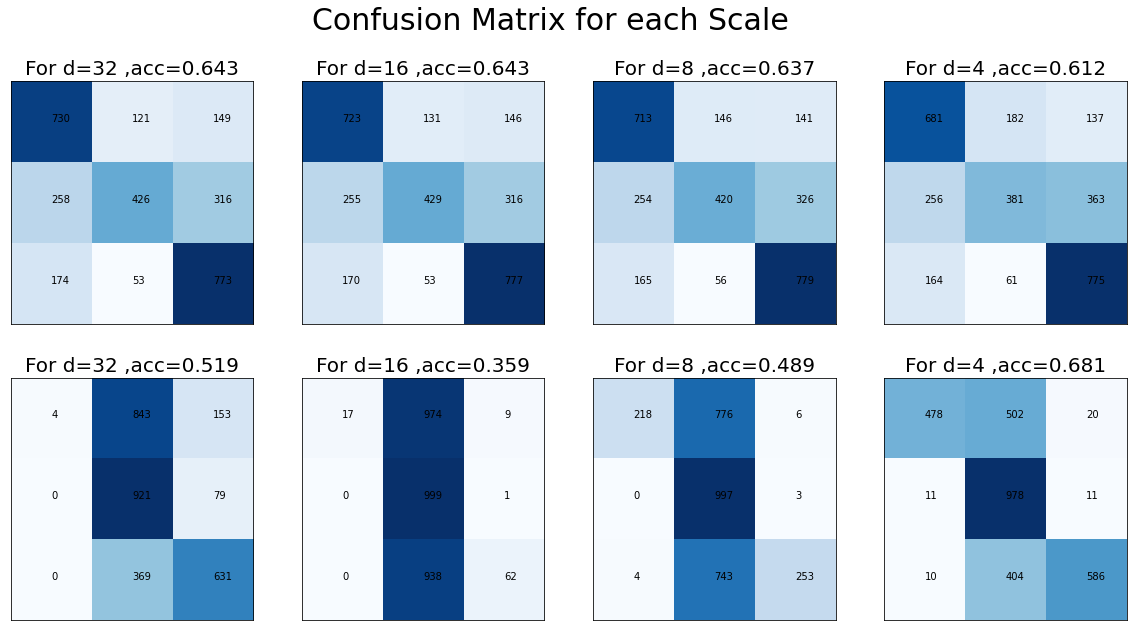

In [384]:
dims = [32,16,8,4,32,16,8,4]
fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Scale",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        axs[pi,pj].set_title("For d="+str(dims[index])+" ,acc="+str(np.round(np.diag(cm).sum()/3000,3)),fontsize=20)
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))

Text(0.5, 1.0, 'NB VS GM')

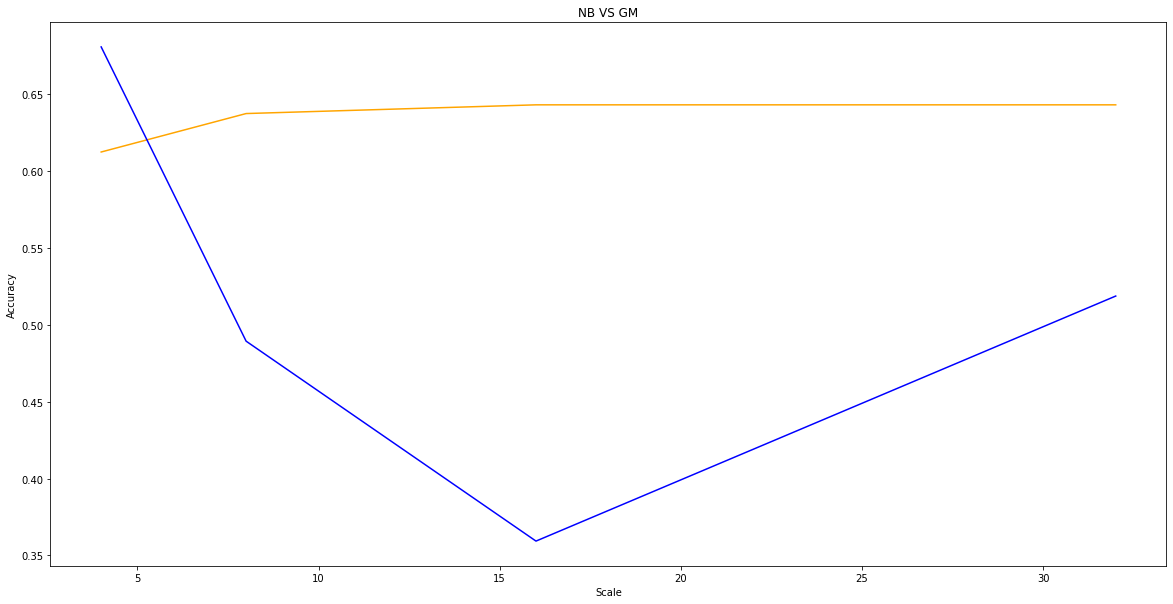

In [385]:
plt.figure(figsize=(20,10))
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_nb],color='orange')
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_gm],color='blue')
plt.xlabel('Scale')
plt.ylabel('Accuracy')
plt.title('NB VS GM')

<hr style="border:2px solid black"> </hr>

## Comment on the results ##

### 
Edit Here
###